In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set()

In [6]:
path = '/home/mcalmeida/machine-learning/projects/case-neoway/individuos_espec.csv'

In [21]:
df_individuos = pd.read_csv(path,sep=';')
df_individuos.head()

,name,idade,estado_civil,qt_filhos,estuda,trabalha,pratica_esportes,transporte_mais_utilizado,IMC
0,1,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956
1,2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720
2,3,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393
3,4,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053
4,5,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668


In [22]:
df_individuos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   name                       1000000 non-null  int64  
 1   idade                      904063 non-null   float64
 2   estado_civil               949927 non-null   object 
 3   qt_filhos                  971133 non-null   float64
 4   estuda                     959870 non-null   float64
 5   trabalha                   993647 non-null   float64
 6   pratica_esportes           850876 non-null   float64
 7   transporte_mais_utilizado  956967 non-null   object 
 8   IMC                        886130 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 68.7+ MB


In [27]:
boolean_dict = {
    1.0:'sim',
    0.0:'não'
}

In [28]:
df_individuos['estuda'].replace(boolean_dict, inplace=True)

In [30]:
df_individuos['trabalha'].replace(boolean_dict, inplace=True)
df_individuos['pratica_esportes'].replace(boolean_dict, inplace=True)

In [31]:
df_individuos.head()

,name,idade,estado_civil,qt_filhos,estuda,trabalha,pratica_esportes,transporte_mais_utilizado,IMC
0,1,44.0,divorciado,1.0,sim,não,sim,publico,22.200956
1,2,24.0,casado,0.0,não,não,sim,publico,25.378720
2,3,35.0,solteiro,1.0,não,não,sim,particular,19.952393
3,4,50.0,casado,1.0,sim,sim,não,publico,26.732053
4,5,30.0,solteiro,2.0,sim,não,sim,publico,15.295668


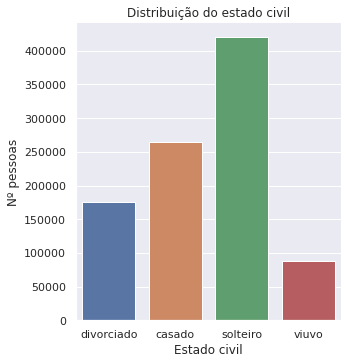

In [11]:
sns.catplot(
    data=df_individuos, 
    x='estado_civil', 
    kind='count'
)
_ = plt.xlabel("Estado civil")
_ = plt.ylabel("Nº indivíduos")
_ = plt.title("Distribuição do estado civil")
plt.show();

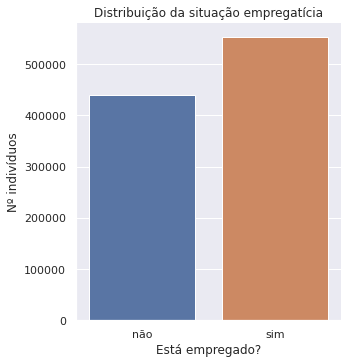

In [32]:
sns.catplot(
    data=df_individuos, 
    x='trabalha', 
    kind='count'
)
_ = plt.xlabel("Está empregado?")
_ = plt.ylabel("Nº indivíduos")
_ = plt.title("Distribuição da situação empregatícia")
plt.show();

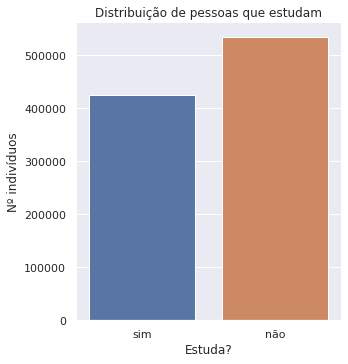

In [37]:
sns.catplot(
    data=df_individuos, 
    x='estuda', 
    kind='count'
)
_ = plt.xlabel("Estuda?")
_ = plt.ylabel("Nº indivíduos")
_ = plt.title("Distribuição de pessoas que estudam")
plt.show();

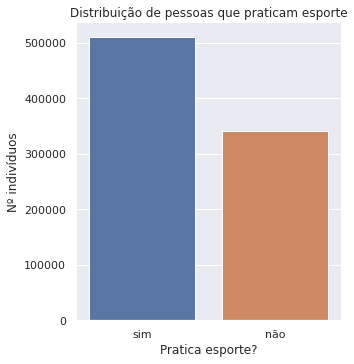

In [39]:
sns.catplot(
    data=df_individuos, 
    x='pratica_esportes', 
    kind='count'
)
_ = plt.xlabel("Pratica esporte?")
_ = plt.ylabel("Nº indivíduos")
_ = plt.title("Distribuição de pessoas que praticam esporte")
plt.show();

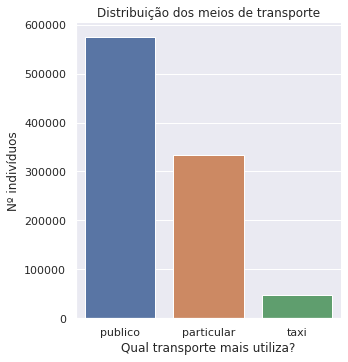

In [35]:
sns.catplot(
    data=df_individuos, 
    x='transporte_mais_utilizado', 
    kind='count'
)

_ = plt.xlabel("Qual transporte mais utiliza?")
_ = plt.ylabel("Nº indivíduos")
_ = plt.title("Distribuição dos meios de transporte")
plt.show();

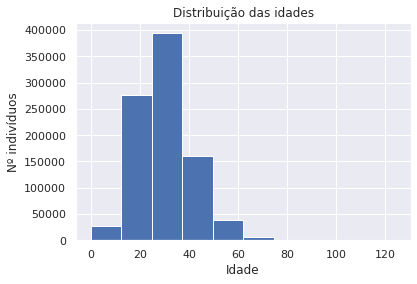

In [36]:
idade = df_individuos['idade']
_ = plt.hist(idade)
_ = plt.xlabel("Idade")
_ = plt.ylabel("Nº indivíduos")
_ = plt.title("Distribuição das idades")
plt.show();

In [ ]:
print()

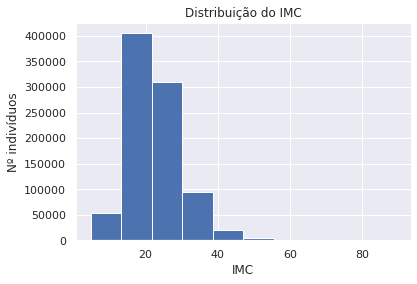

In [41]:
IMC = df_individuos['IMC']
_ = plt.hist(IMC)
_ = plt.xlabel("IMC")
_ = plt.ylabel("Nº indivíduos")
_ = plt.title("Distribuição do IMC")
plt.show();

In [46]:
imc_labels = [
    'muito_abaixo',
    'abaixo',
    'normal',
    'acima',
    'obesidade_I',
    'obesidade_II',
    'obesidade_III',
]

imc_bins = [16, 17, 18.5, 25, 30,35,40, np.inf]

In [47]:
df_individuos["imc_cat"] = pd.cut(
    df_individuos["IMC"],
    bins=imc_bins,
    labels=imc_labels
)

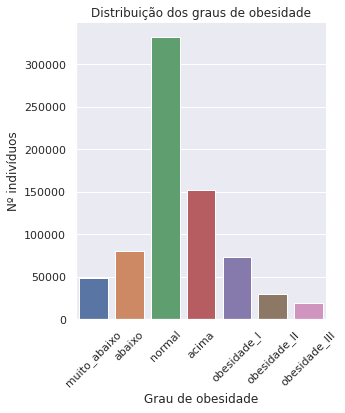

In [52]:
sns.catplot(
    data=df_individuos, 
    x='imc_cat', 
    kind='count'
)
_ = plt.xlabel("Grau de obesidade")
_ = plt.xticks(rotation=45)
_ = plt.ylabel("Nº indivíduos")
_ = plt.title("Distribuição dos graus de obesidade")
plt.show();

KeyboardInterrupt: 

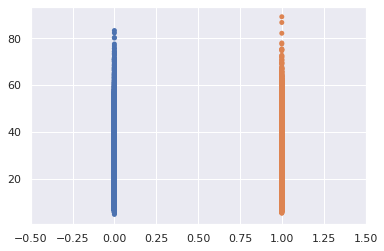

In [40]:
_ = sns.swarmplot(x='pratica_esportes', y='IMC', data=df_individuos)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

# ECDF

In [10]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n


    return x, y


In [7]:
# Prepare the data
x,y = ecdf(array)

In [ ]:
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('x_label')
_ = plt.ylabel('ECDF')
plt.margins(0.02) 
# Keeps data off plot edges
plt.show()

# Summary statistics: sample mean and median

## Mean

In [ ]:
np.mean(array)

## Median

In [ ]:
np.median(array)

## Percentile

In [ ]:
np.percentile(array, [array of percentiles])

Box plot are good to visualize these summaries

In [ ]:
_ = sns.boxplot(x='x_variable', y='y_variable',data=df)
_ = plt.xlabel('x_label')
_ = plt.ylabel('y_label')
plt.show()


## Variance

In [ ]:
np.var(array)

## Standard deviation

In [ ]:
np.std(array)

In [ ]:
np.std(array) = np.sqrt(np.var(array))

##  Scatter plot

In [ ]:
_ = plt.plot(
        quantity_1, 
        quantity_2,                 
        marker='.', 
        linestyle='none'
    )
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')

## Covariance matrix

ρ=Pearson correlation

=covariance/(std of x)(std of y)

= variability due to codependence/independant variability

The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.


In [ ]:
# Covariance matrix
np.cov(quantity_1,quantity_2)

In [ ]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.cov(x,y)/(np.std(x)*np.std(x=y))

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r


# Print the result

In [ ]:
# Correlation matrix
np.corrcoef(x,y)

In [ ]:
# Pearon r coefficient

np.corrcoef(x,y)